In [85]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat

import os
import shutil
import random

In [ ]:
folder_path = os.path.dirname(os.path.dirname(os.getcwd()))
folder_path

In [86]:
def crop_image_half(image, flag):
        '''
        Crops the image, cutting from height and width depending on crop_perc.
        '''
        if flag == 'L':
            height, width = image.shape[:2]
            w_crop = int((50/100*width))
            return image[:, :w_crop]
        if flag == 'R':
            height, width = image.shape[:2]
            w_crop = int((50/100*width))
            return image[:, w_crop:]

In [87]:
directory_path_labels = r''+folder_path+r'\NewImages\Dataset-RIMONE\Dataset-RIMONE\SegmentationsAverage-GroundTruth'
targer_dir_path_labels = r''+folder_path+r'\Data\Test_gt'
filenames_labels = os.listdir(directory_path_labels)
filenames_labels_target = os.listdir(targer_dir_path_labels)

In [88]:
directory_path_images = r''+folder_path+r'\NewImages\Dataset-RIMONE\Dataset-RIMONE\images'
targer_dir_path_images = r''+folder_path+r'\Data\Test'
filenames_images = os.listdir(directory_path_images)
filenames_images_target = os.listdir(targer_dir_path_images)

In [12]:
new_filename_counter = 1
new_filename = '000'

for i in range(120):
    if new_filename_counter<10:
        new_filename = '00' + str(new_filename_counter)
    if new_filename_counter>=10 and new_filename_counter<100: 
        new_filename = '0' + str(new_filename_counter)
    if new_filename_counter>=100:
        new_filename = str(new_filename_counter)
    print(new_filename)
    new_filename_counter +=1

001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
036
037
038
039
040
041
042
043
044
045
046
047
048
049
050
051
052
053
054
055
056
057
058
059
060
061
062
063
064
065
066
067
068
069
070
071
072
073
074
075
076
077
078
079
080
081
082
083
084
085
086
087
088
089
090
091
092
093
094
095
096
097
098
099
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


In [89]:
new_filename_counter = 0
new_filename = '000'


for filename_img, filename_lab in zip(filenames_images, filenames_labels):
    new_filename_counter +=1
    if new_filename_counter<10:
        new_filename = '00' + str(new_filename_counter)
    if new_filename_counter>=10 and new_filename_counter<100: 
        new_filename = '0' + str(new_filename_counter)
    if new_filename_counter>=100:
        new_filename = str(new_filename_counter)
    
    src_image = directory_path_images +'\/'+ filename_img
    trg_image = targer_dir_path_images + '\/' + new_filename + '.jpg'

    src_label = directory_path_labels +'\/'+ filename_lab
    trg_label = targer_dir_path_labels + '\/' + new_filename + '.mat'

    image = cv2.imread(src_image)
    label = cv2.imread(src_label)

    label = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)

    label[(label>0) & (label<250)] = 1
    label[label>250] = 2
    
    if filename_img.find('L')!= -1:
        image = crop_image_half(image, 'L')
    if filename_img.find('R') != -1:
        image = crop_image_half(image, 'R')

    cv2.imwrite(trg_image, image)
    savemat(trg_label, {'mask':label})

In [77]:
mat01 = cv2.imread(r''+folder_path+r'\NewImages\Dataset-RIMONE\Dataset-RIMONE\SegmentationsAverage-GroundTruth\G-1-L.png')
image = cv2.imread(r''+folder_path+r'\NewImages\Dataset-RIMONE\Dataset-RIMONE\images\G-1-L.jpg')

In [78]:
type(mat01)

numpy.ndarray

In [79]:
mat01 = cv2.cvtColor(mat01, cv2.COLOR_BGR2GRAY)

In [80]:
image.shape

(1424, 2144, 3)

In [81]:
mat01.shape

(1424, 1072)

In [67]:
unique_values, counts = np.unique(mat01, return_counts=True)

In [68]:
for value, count in zip(unique_values, counts):
    print(str(value) +":    "+str(count))

0:    1462277
1:    36270
2:    27981


In [66]:
mat01[(mat01>0) & (mat01<250)] = 1
mat01[mat01>250] = 2

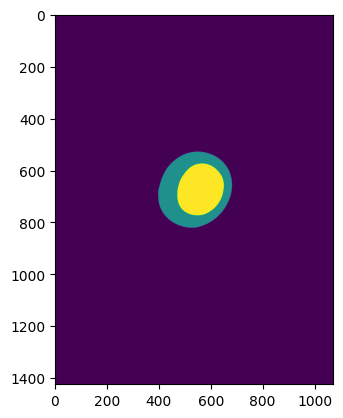

In [69]:
plt.imshow(mat01)